   triple  vertical
0  383.00     33.00
1  781.00     71.10
2  561.62     62.25
3  624.52     61.33
4  446.24     40.19
0.8343076972837598
Edwards vertical jump prediction: 0.13366770759420454


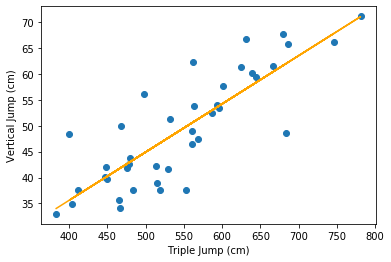

In [7]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

def standard_units(array_of_numbers): #Converts an array to standard units
    return (array_of_numbers-np.mean(array_of_numbers))/np.std(array_of_numbers)

def correlation(x,y): #x and y are columns in a df. 
    return np.mean(standard_units(x)*standard_units(y))

def reg_slope(x,y): #x and y are columns in a df.
    return (correlation(x,y)*(np.std(y)/np.std(x)))

def reg_intercept(x,y): #x and y are columns in a df.
    return np.mean(y)-reg_slope(x,y)*(np.mean(x))

t=pd.read_csv("triple_vertical.csv")

print(t.head())
print(correlation(t.triple, t.vertical))

plt.scatter(t.triple,t.vertical)

plt.plot(t.triple, reg_slope(t.triple,t.vertical)*t.triple+reg_intercept(t.triple, t.vertical), color="orange")

plt.xlabel("Triple Jump (cm)")
plt.ylabel("Vertical Jump (cm)")

#Q4: The world record for the triple jump distance is 18.29 meters by Johnathan Edwards. 
#What's our prediction for what Edwards' vertical jump would be?

#Note: must change 18.29m to cm.

m=reg_slope(t.triple, t.vertical)
b=reg_intercept(t.triple, t.vertical)

print("Edwards vertical jump prediction: "+str(m*(18.29)+b))